In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [8]:
figscale = 0.8
FIGSIZE = (14*figscale, 8*figscale)

In [3]:
df = pd.read_pickle('..//data//extended_model_simulations.pkl')

In [34]:

kids1 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 30) & (df['K_plus_20'] == 1)]['episode'])
kids0 = set(df.loc[(df['K_plus'] == 0) & (df['K_plus_20'] == 0)]['episode'])

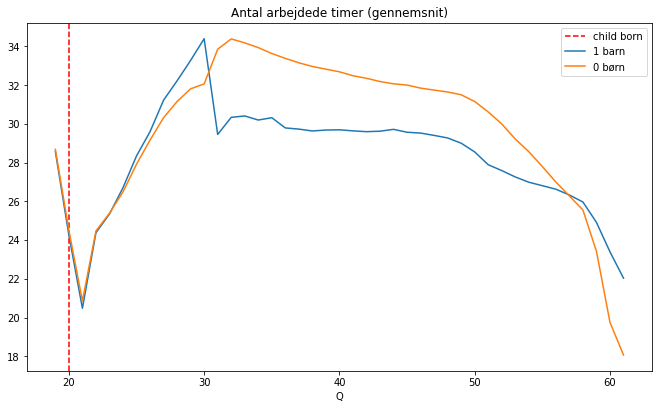

In [35]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Antal arbejdede timer (gennemsnit)")
ax.axvline(x=20, label='child born', ls='--', color='red')

df.loc[df['episode'].isin(kids1)].groupby('Q')['action'].mean().plot(label='1 barn')
df.loc[df['episode'].isin(kids0)].groupby('Q')['action'].mean().plot(label='0 børn')

ax.legend()

In [36]:
len(kids1) ,len(kids0)


(1231, 17224)